<a href="https://colab.research.google.com/github/MengyuLIANG1/GAT/blob/main/GNN%26GAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Session on Graph Neural Networks

**by Matthieu Nastorg**

## **PART 1 : CODING** (8/20)

### Install Pytorch Geometric

To handle graph data, we use the library Pytorch Geometric : https://pytorch-geometric.readthedocs.io/en/latest/

*   If you use _Google Colab_, simply run the following cell to install Pytorch Geometric (**advised**).
*   If you plan using your _own environment_, follow the documentation to install Pytorch Geometric : https://pytorch-geometric.readthedocs.io/en/latest/install/installation.html and skip the following cell.

In [ ]:
########## INSTALL TORCH GEOMETRIC ##################
# https://pytorch-geometric.readthedocs.io/en/latest/ 
#####################################################
import torch 

def format_pytorch_version(version):
  return version.split('+')[0]

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
  return 'cu' + version.replace('.', '')

CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

!pip install torch-scatter     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse      -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 38.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 24.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 17.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.9/873.9 KB 7.4

### Import required packages

Run the following cell to import all required packages. This cell **must not** be modified.

To significantly accelerate your training, it is advised to use GPU. Using Google Colab, you need to activate it : 

*   Edit --> Notebook Setting --> Hardware accelerator --> GPU

In [ ]:
#####################################################
################## PACKAGES #########################
#####################################################
import numpy as np
import matplotlib.pyplot as plt

import torch.nn as nn
import torch_geometric.nn as graphnn
from sklearn.metrics import f1_score
from torch_geometric.datasets import PPI
from torch_geometric.loader import DataLoader

### Dataset

We use the Protein-Protein Interaction (PPI) network dataset which includes:
- 20 graphs for training 
- 2 graphs for validation
- 2 graphs for testing

One graph of the PPI dataset has on average 2372 nodes. Each node:
- 50 features : positional gene sets / motif gene / immunological signatures ...
- 121 (binary) labels : gene ontology sets (way to classify gene products like proteins).

**This problem aims to predict, for a given PPI graph, the correct node's labels**.

**It is a node (multi-level) classification task** (trained using supervised learning). 

For your curiosity, more details information on the dataset and some applications:
- https://cs.stanford.edu/~jure/pubs/pathways-psb18.pdf
- https://arxiv.org/abs/1707.04638

To understand how a graph data is implemented in Pytorch Geometric, refer to : https://pytorch-geometric.readthedocs.io/en/latest/get_started/introduction.html


In [ ]:
### LOAD DATASETS

BATCH_SIZE = 2 

# Train Dataset
train_dataset = PPI(root="", split='train')
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE)
# Val Dataset
val_dataset = PPI(root="", split='val')
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
# Test Dataset
test_dataset = PPI(root="", split='test')
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# Number of features and classes
n_features, n_classes = train_dataset[0].x.shape[1], train_dataset[0].y.shape[1]

print("Number of samples in the train dataset: ", len(train_dataset))
print("Number of samples in the val dataset: ", len(test_dataset))
print("Number of samples in the test dataset: ", len(test_dataset))
print("Output of one sample from the train dataset: ", train_dataset[0])
print("Edge_index :")
print(train_dataset[0].edge_index)
print("Number of features per node: ", n_features)
print("Number of classes per node: ", n_classes)

Extracting ./ppi.zip
Processing...


Number of samples in the train dataset:  20
Number of samples in the val dataset:  2
Number of samples in the test dataset:  2
Output of one sample from the train dataset:  Data(x=[1767, 50], edge_index=[2, 32318], y=[1767, 121])
Edge_index :
tensor([[   0,    0,    0,  ..., 1744, 1745, 1749],
        [ 372, 1101,  766,  ..., 1745, 1744, 1739]])
Number of features per node:  50
Number of classes per node:  121


Done!


In [ ]:
for i, train_batch in enumerate(train_dataloader):
            print(train_batch.x.shape,train_batch.y.shape)

torch.Size([3144, 50]) torch.Size([3144, 121])
torch.Size([4602, 50]) torch.Size([4602, 121])
torch.Size([2599, 50]) torch.Size([2599, 121])
torch.Size([4311, 50]) torch.Size([4311, 121])
torch.Size([3903, 50]) torch.Size([3903, 121])
torch.Size([4279, 50]) torch.Size([4279, 121])
torch.Size([5299, 50]) torch.Size([5299, 121])
torch.Size([5120, 50]) torch.Size([5120, 121])
torch.Size([5465, 50]) torch.Size([5465, 121])
torch.Size([6184, 50]) torch.Size([6184, 121])


### Define a basic Model

Here we define a very simple Graph Neural Network model which will be used as our baseline. This model consists of three graph convolutional layers (from https://arxiv.org/pdf/1609.02907.pdf). The first two layers computes 256 features, followed by an ELU activation function. The last layer is used for (multi-level) classification task, computing 121 features.

In [ ]:
#####################################################
################## MODEL ############################
#####################################################
class BasicGraphModel(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()

        self.graphconv1 = graphnn.GCNConv(input_size, hidden_size)
        self.graphconv2 = graphnn.GCNConv(hidden_size, hidden_size)
        self.graphconv3 = graphnn.GCNConv(hidden_size, output_size)

        self.elu = nn.ELU()

    def forward(self, x, edge_index):

        x = self.graphconv1(x, edge_index)
        x = self.elu(x)
        x = self.graphconv2(x, edge_index)
        x = self.elu(x)
        x = self.graphconv3(x, edge_index)

        return x

Next we construct the function to train the model.

In [ ]:
#####################################################
############## TRAIN FUNCTION #######################
#####################################################
def train(model, loss_fcn, device, optimizer, max_epochs, train_dataloader, val_dataloader):

    epoch_list = []
    scores_list = []

    # loop over epochs
    for epoch in range(max_epochs):
        model.train()
        losses = []
        # loop over batches
        for i, train_batch in enumerate(train_dataloader):
            optimizer.zero_grad()
            train_batch_device = train_batch.to(device)
            # logits is the output of the model
            logits = model(train_batch_device.x, train_batch_device.edge_index)
            # compute the loss
            loss = loss_fcn(logits, train_batch_device.y)
            # optimizer step
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
        loss_data = np.array(losses).mean()
        print("Epoch {:05d} | Loss: {:.4f}".format(epoch + 1, loss_data))

        if epoch % 5 == 0:
            # evaluate the model on the validation set
            # computes the f1-score (see next function)
            score = evaluate(model, loss_fcn, device, val_dataloader)
            print("F1-Score: {:.4f}".format(score))
            scores_list.append(score)
            epoch_list.append(epoch)

    return epoch_list, scores_list

Next function is designed to evaluate the performance of the model, computing the F1-Score

In [ ]:
#####################################################
############### TEST FUNCTION #######################
#####################################################
def evaluate(model, loss_fcn, device, dataloader):

    score_list_batch = []

    model.eval()
    for i, batch in enumerate(dataloader):
        batch = batch.to(device)
        output = model(batch.x, batch.edge_index)
        loss_test = loss_fcn(output, batch.y)
        predict = np.where(output.detach().cpu().numpy() >= 0, 1, 0)
        score = f1_score(batch.y.cpu().numpy(), predict, average="micro")
        score_list_batch.append(score)

    return np.array(score_list_batch).mean()

Let's train this model !

In [ ]:
### DEVICE GPU OR CPU : will select GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

### Max number of epochs
max_epochs = 200

### DEFINE THE MODEL
basic_model = BasicGraphModel(  input_size = n_features, 
                                hidden_size = 256, 
                                output_size = n_classes).to(device)

### DEFINE LOSS FUNCTION
loss_fcn = nn.BCEWithLogitsLoss()

### DEFINE OPTIMIZER
optimizer = torch.optim.Adam(basic_model.parameters(), lr=0.005)

### TRAIN THE MODEL
epoch_list, basic_model_scores = train(basic_model, loss_fcn, device, optimizer, max_epochs, train_dataloader, val_dataloader)


Device:  cuda
Epoch 00001 | Loss: 0.6367
F1-Score: 0.4423
Epoch 00002 | Loss: 0.5807
Epoch 00003 | Loss: 0.5617
Epoch 00004 | Loss: 0.5559
Epoch 00005 | Loss: 0.5511
Epoch 00006 | Loss: 0.5463
F1-Score: 0.4984
Epoch 00007 | Loss: 0.5417
Epoch 00008 | Loss: 0.5374
Epoch 00009 | Loss: 0.5340
Epoch 00010 | Loss: 0.5314
Epoch 00011 | Loss: 0.5289
F1-Score: 0.5298
Epoch 00012 | Loss: 0.5263
Epoch 00013 | Loss: 0.5238
Epoch 00014 | Loss: 0.5214
Epoch 00015 | Loss: 0.5192
Epoch 00016 | Loss: 0.5172
F1-Score: 0.5201
Epoch 00017 | Loss: 0.5151
Epoch 00018 | Loss: 0.5131
Epoch 00019 | Loss: 0.5109
Epoch 00020 | Loss: 0.5082
Epoch 00021 | Loss: 0.5060
F1-Score: 0.5325
Epoch 00022 | Loss: 0.5042
Epoch 00023 | Loss: 0.5023
Epoch 00024 | Loss: 0.5004
Epoch 00025 | Loss: 0.4987
Epoch 00026 | Loss: 0.4968
F1-Score: 0.5360
Epoch 00027 | Loss: 0.4949
Epoch 00028 | Loss: 0.4931
Epoch 00029 | Loss: 0.4914
Epoch 00030 | Loss: 0.4898
Epoch 00031 | Loss: 0.4884
F1-Score: 0.5319
Epoch 00032 | Loss: 0.4872
Ep

Let's evaluate the performance of this basic model

Basic Model : F1-Score on the test set: 0.6390


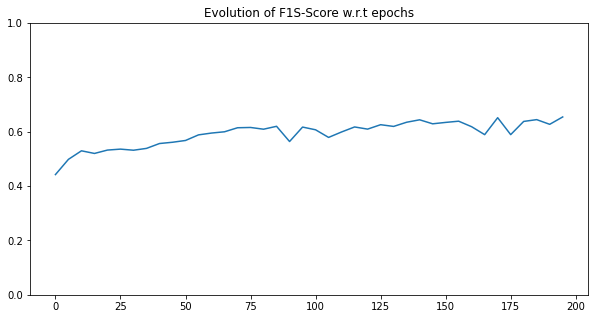

In [ ]:
### F1-SCORE ON TEST DATASET
score_test = evaluate(basic_model, loss_fcn, device, test_dataloader)
print("Basic Model : F1-Score on the test set: {:.4f}".format(score_test))

### PLOT EVOLUTION OF F1-SCORE W.R.T EPOCHS
def plot_f1_score(epoch_list, scores) :
    plt.figure(figsize=[10,5])
    plt.plot(epoch_list, scores)
    plt.title("Evolution of F1S-Score w.r.t epochs")
    plt.ylim([0.0, 1.0])
    plt.show()
    
plot_f1_score(epoch_list, basic_model_scores)

### Define a better model

Now, it's your turn to improve this basic model ! To do so, complete whenever ###### YOUR ANSWER ######## and run the two following cells.

**HINT :** https://arxiv.org/pdf/1710.10903.pdf

In [ ]:
class GAT(nn.Module):
    def __init__(self, in_size, hid_size, out_size, heads):
        super().__init__()
        self.gat_layers = nn.ModuleList()
        # three-layer GAT
        self.gat_layers.append(
            graphnn.GATv2Conv(in_size, hid_size, heads[0],concat=True, dropout=0.0)
        )
        self.gat_layers.append(
            graphnn.GATConv(
                hid_size * heads[0],
                hid_size,
                heads[1],
                dropout=0.0,
                concat=True,
            )
        )

        self.gat_layers.append(
            graphnn.GATv2Conv(
                hid_size * heads[1],
                out_size,
                heads[2],
                dropout=0.0,
                concat=False
            )
        )
        self.elu=nn.ELU()

    def forward(self, x, edge_index):
        for i, layer in enumerate(self.gat_layers):
            x = layer(x, edge_index)
            if i == 2:  # last layer
                x = x
            else:  # other layers
                x = self.elu(x)
                x = nn.functional.dropout(x, p=0.0, training=self.training)
        return x

Let's train your model !

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

max_epochs = 200

## Student model
student_model = GAT(in_size = n_features, 
                    hid_size = 256, 
                    out_size = n_classes,
                    heads=[4,4,6]).to(device)

### DEFINE LOSS FUNCTION AND OPTIMIZER
optimizer = torch.optim.Adam(student_model.parameters(), lr=0.005)
loss_fcn = nn.BCEWithLogitsLoss()
### TRAIN
epoch_list, student_model_scores = train(student_model, loss_fcn, device, optimizer, max_epochs, train_dataloader, val_dataloader)


Device:  cuda
Epoch 00001 | Loss: 0.6481
F1-Score: 0.3675
Epoch 00002 | Loss: 0.5592
Epoch 00003 | Loss: 0.5468
Epoch 00004 | Loss: 0.5375
Epoch 00005 | Loss: 0.5243
Epoch 00006 | Loss: 0.5143
F1-Score: 0.4914
Epoch 00007 | Loss: 0.5051
Epoch 00008 | Loss: 0.4995
Epoch 00009 | Loss: 0.4890
Epoch 00010 | Loss: 0.4749
Epoch 00011 | Loss: 0.4596
F1-Score: 0.5888
Epoch 00012 | Loss: 0.4506
Epoch 00013 | Loss: 0.4456
Epoch 00014 | Loss: 0.4282
Epoch 00015 | Loss: 0.4094
Epoch 00016 | Loss: 0.4051
F1-Score: 0.6091
Epoch 00017 | Loss: 0.3959
Epoch 00018 | Loss: 0.3883
Epoch 00019 | Loss: 0.3668
Epoch 00020 | Loss: 0.3477
Epoch 00021 | Loss: 0.3308
F1-Score: 0.7402
Epoch 00022 | Loss: 0.3245
Epoch 00023 | Loss: 0.3193
Epoch 00024 | Loss: 0.3077
Epoch 00025 | Loss: 0.2921
Epoch 00026 | Loss: 0.2799
F1-Score: 0.7749
Epoch 00027 | Loss: 0.2708
Epoch 00028 | Loss: 0.2578
Epoch 00029 | Loss: 0.2522
Epoch 00030 | Loss: 0.2505
Epoch 00031 | Loss: 0.2540
F1-Score: 0.8003
Epoch 00032 | Loss: 0.2420
Ep

Let's evaluate the performance of your model

Student Model : F1-Score on the test set: 0.9820


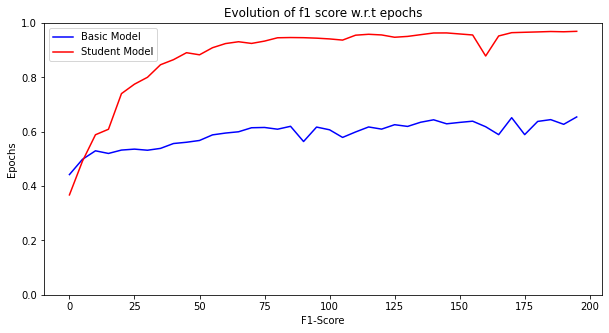

In [ ]:
score_test = evaluate(student_model, loss_fcn, device, test_dataloader)
print("Student Model : F1-Score on the test set: {:.4f}".format(score_test))

def plot_f1_score(epoch_list, basic_model_scores, student_model_scores) :
    plt.figure(figsize = [10,5])
    plt.plot(epoch_list, basic_model_scores, 'b', label = "Basic Model")
    plt.plot(epoch_list, student_model_scores, 'r', label = "Student Model")
    plt.title("Evolution of f1 score w.r.t epochs")
    plt.ylim([0.0, 1.0])
    plt.ylabel("Epochs")
    plt.xlabel("F1-Score")
    plt.legend()
    plt.show()
    
plot_f1_score(epoch_list, basic_model_scores, student_model_scores)